# train models (dangerous, overites data)

In [67]:
# vanilla fedavg
! python server.py -nc 200 -cf 0.2 -of fedavg-c0.2


/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mattie/miniconda3/envs/Fe

In [95]:
# fogFL
! python server_hierar.py -nc 200 -cf 0.3 -ns 6 -vf 10  -of fogfl-c0.3-v0.03-e10

/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mattie/miniconda3/envs/Fe

In [125]:
# fogFL ng
! python server_distrib.py -nc 200 -cf 0.3 -ns 6 -srf 0.2 -of fogfl-ng-c0.3-v0.03-a0.2

/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mattie/miniconda3/envs/Fe

# Obeservations, ML

In [147]:
import os
import sys
from matplotlib import pyplot as plt
import json
from typing import List
import numpy as np

DATA_DIR = 'obeserve'
MAX_ROUNDS = 20


In [137]:
# get ml metrics per round
def get_ml_metric(metric_key: str, data_file: str, max_rounds: int):
    with open(data_file, 'r') as f:
        data = json.load(f)
        vals = []
        for round_data in data['data'][0:MAX_ROUNDS]:
            vals.append(round_data[metric_key])
        return vals

In [152]:
data_files = []
for d in os.listdir(DATA_DIR):
    if os.path.isfile(os.path.join(DATA_DIR, d)):
        data_files.append(d)
data_files.sort()

In [128]:
# function for plotting metric
def plot_metric(metric_key: str, data_files: List[str], rounds: int):
    plt.figure(0)
    x_vals = range(1, rounds + 1)
    for d in data_files:
        y_vals = get_ml_metric(metric_key, f'{DATA_DIR}/{d}', MAX_ROUNDS)
        plt.plot(x_vals, y_vals, label=d)
    plt.legend()
    plt.xlabel('communication rounds')
    plt.xticks(x_vals)
    plt.ylabel(metric_key)
    plt.show()

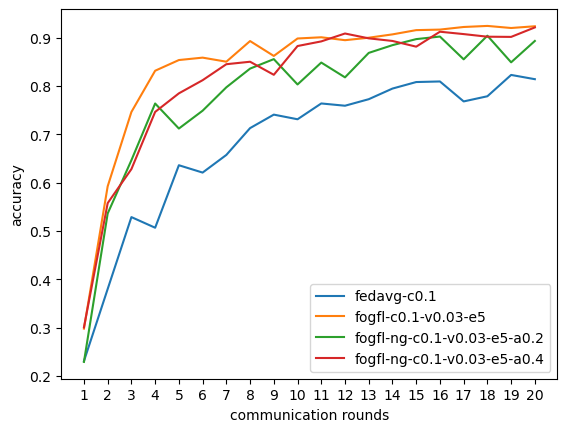

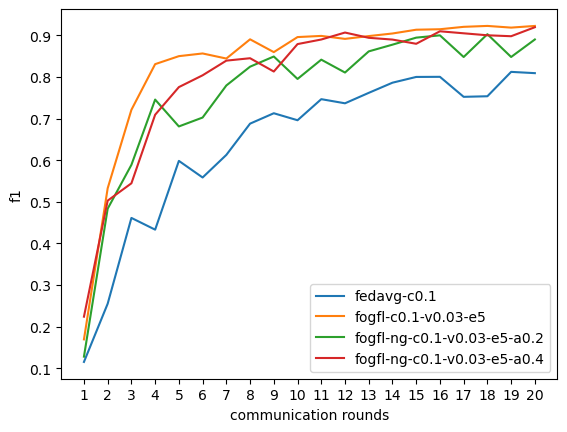

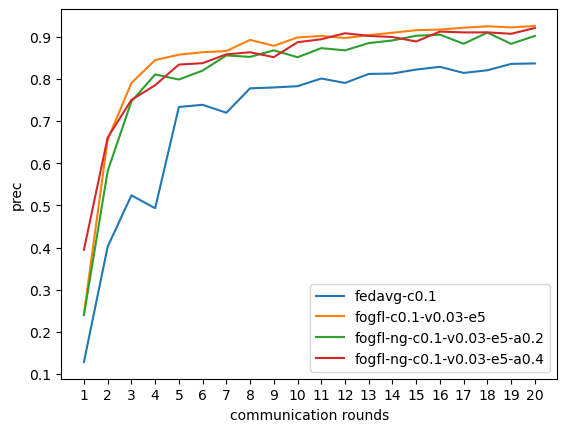

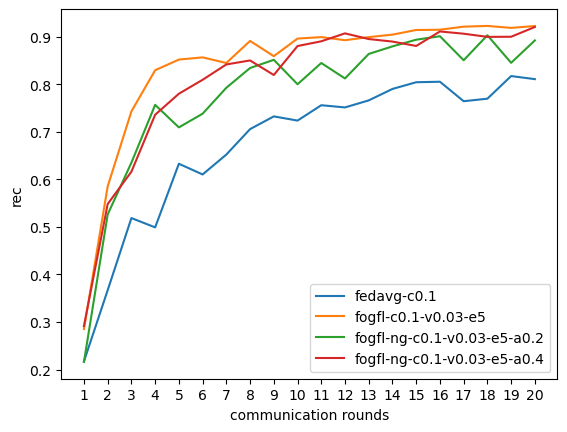

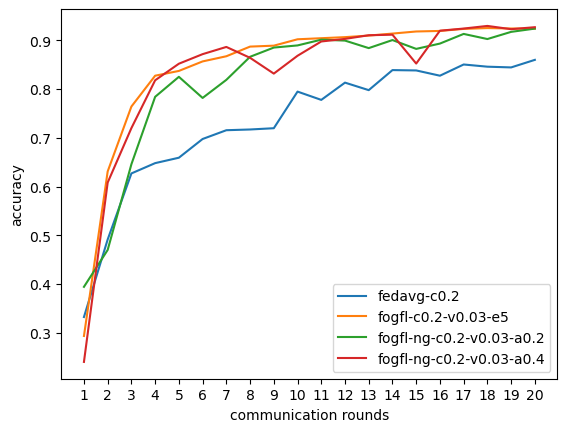

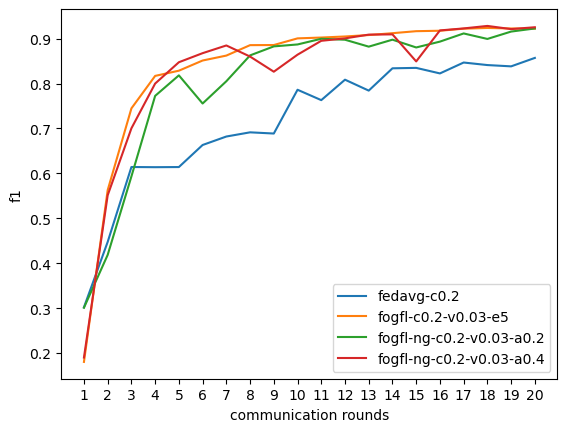

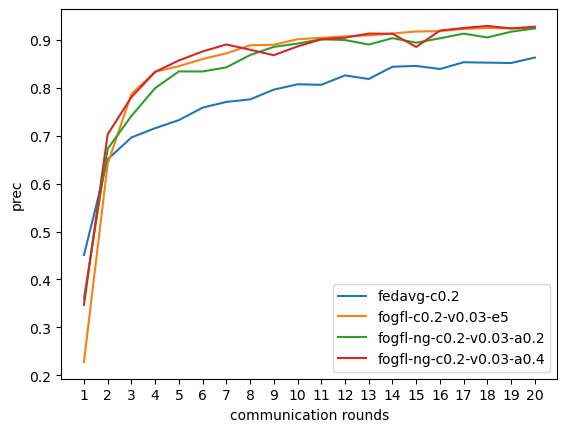

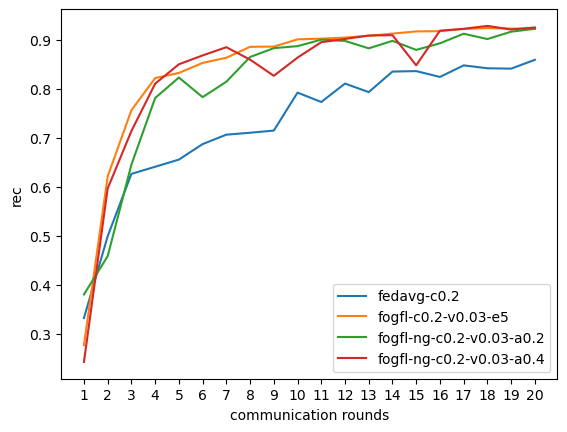

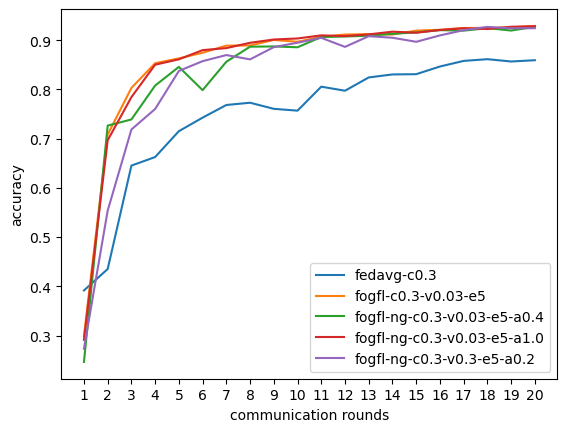

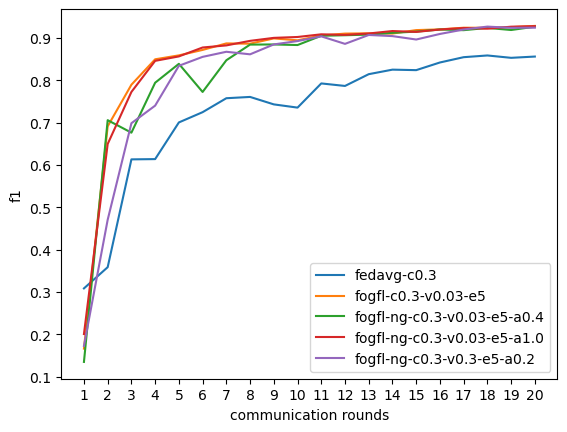

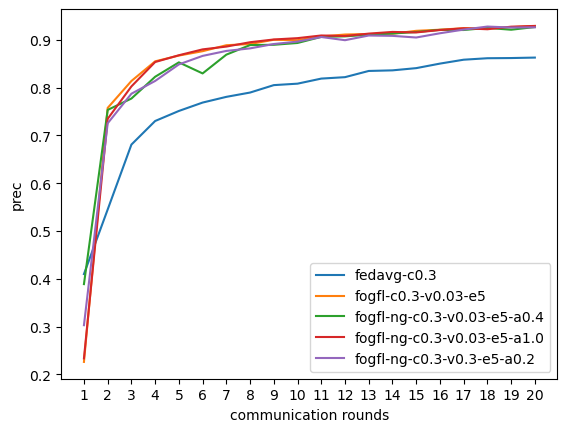

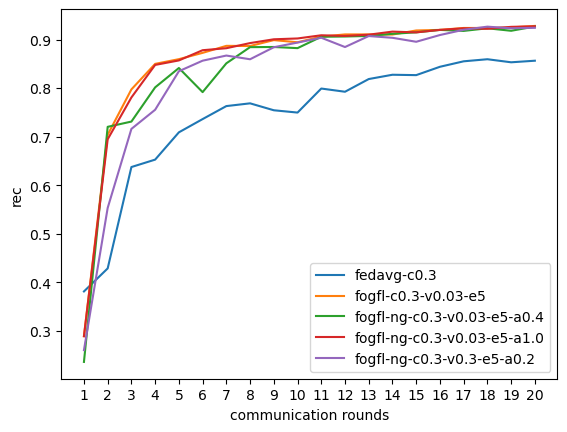

In [146]:
def plot_metric_per_c(cvals: List[float]):
    for c in cvals:
        data_files_to_take = []
        for d in data_files:
            if d.find(f'c{c}') != -1:
                data_files_to_take.append(d)
        
        plot_metric('accuracy', data_files_to_take, MAX_ROUNDS)
        plot_metric('f1', data_files_to_take, MAX_ROUNDS)
        plot_metric('prec', data_files_to_take, MAX_ROUNDS)
        plot_metric('rec', data_files_to_take, MAX_ROUNDS)

plot_metric_per_c([0.1, 0.2, 0.3])

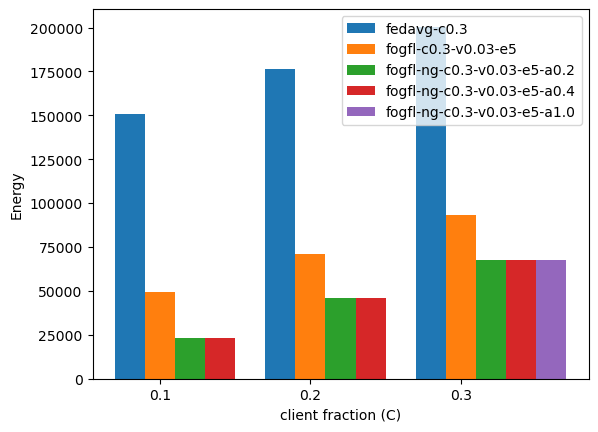

In [162]:
# other metrics
def get_energy(data_file: str, max_rounds: int):
    with open(data_file, 'r') as f:
        data: dict = json.load(f)
        point: dict = data['data'][max_rounds-1]
        energy = 0
        if 'energy_fog' not in point:
            point = data['data'][99]
        if 'energy_global' in point:
            energy += point['energy_global']
        if 'energy_client' in point:
            energy += point['energy_client']
        if 'energy_fog' in point:
            energy += point['energy_fog']
        return energy


def plot_energy_bar(cvals: List[float], max_rounds):
    x_axis = np.arange(len(cvals))

    cbuckets = {c:[] for c in cvals}
    for c in cvals:
        for d in data_files:
            if d.find(f'c{c}') != -1:
                cbuckets[c].append(d)
    
    # plot each series
    no_of_series = 0
    for c in cbuckets:
        no_of_series = max([len(cbuckets[c]), no_of_series])
    
    x_axis = np.arange(len(cvals))
    for i in range(no_of_series):
        series_to_plot = []
        for c in cbuckets:
            if len(cbuckets[c]) <= i:
                series_to_plot.append(0.0)
            else:
                series_to_plot.append(get_energy(f'{DATA_DIR}/{cbuckets[c][i]}', max_rounds))
        
        width = 0.2
        plt.bar(x_axis + width*i, series_to_plot, width, label=cbuckets[0.3][i])
    plt.xticks(x_axis +width, [str(c) for c in cvals])
    plt.xlabel('client fraction (C)')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()



plot_energy_bar([0.1, 0.2, 0.3], MAX_ROUNDS)  
        
    
    
    


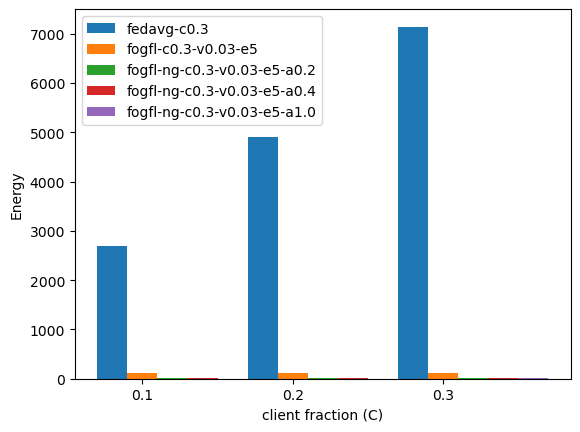

In [165]:
# latency
def get_latency(data_file: str, max_rounds: int):
    with open(data_file, 'r') as f:
        data: dict = json.load(f)
        point: dict = data['data'][max_rounds-1]
        latency = 0
        if 'latency' in point:
            latency += point['latency']
        if 'latency_local_agg' in point:
            latency += point['latency_local_agg']
        if 'latency_global_agg' in point:
            latency += point['latency_global_agg']
        return latency
    
def plot_latency_bar(cvals: List[float], max_rounds):
    x_axis = np.arange(len(cvals))

    cbuckets = {c:[] for c in cvals}
    for c in cvals:
        for d in data_files:
            if d.find(f'c{c}') != -1:
                cbuckets[c].append(d)
    
    # plot each series
    no_of_series = 0
    for c in cbuckets:
        no_of_series = max([len(cbuckets[c]), no_of_series])
    
    x_axis = np.arange(len(cvals))
    for i in range(no_of_series):
        series_to_plot = []
        for c in cbuckets:
            if len(cbuckets[c]) <= i:
                series_to_plot.append(0.0)
            else:
                series_to_plot.append(get_latency(f'{DATA_DIR}/{cbuckets[c][i]}', max_rounds))
        
        width = 0.2
        plt.bar(x_axis + width*i, series_to_plot, width, label=cbuckets[0.3][i])
    plt.xticks(x_axis +width, [str(c) for c in cvals])
    plt.xlabel('client fraction (C)')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()


plot_latency_bar([0.1, 0.2, 0.3], MAX_ROUNDS)  
